In [1]:
import pandas as pd

df = pd.read_csv('lego_sets.csv')
lego_themes = pd.read_csv('parent_themes.csv')

In [2]:
df.head(10)

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
5,0014-1,Space Mini-Figures,1979,12.0,Supplemental,Space
6,0015-1,Space Mini-Figures,1979,NaN,Supplemental,Space
7,0016-1,Castle Mini Figures,1978,NaN,Castle,Castle
8,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland
9,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland


In [54]:
df.shape

(11986, 6)

In [24]:
lego_themes.head(10)

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False
5,147,Pirates,False
6,155,Modular Buildings,False
7,158,Star Wars,True
8,186,Castle,False
9,204,Designer Sets,False


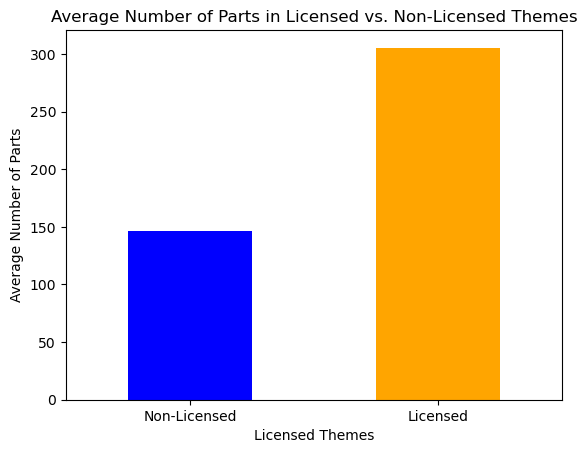

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart showing the average number of parts in licensed vs. non-licensed themes
avg_parts_by_license = merged_df.groupby('is_licensed')['num_parts'].mean()
avg_parts_by_license.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Number of Parts in Licensed vs. Non-Licensed Themes')
plt.xlabel('Licensed Themes')
plt.ylabel('Average Number of Parts')
plt.xticks([0, 1], ['Non-Licensed', 'Licensed'], rotation=0)
plt.show()


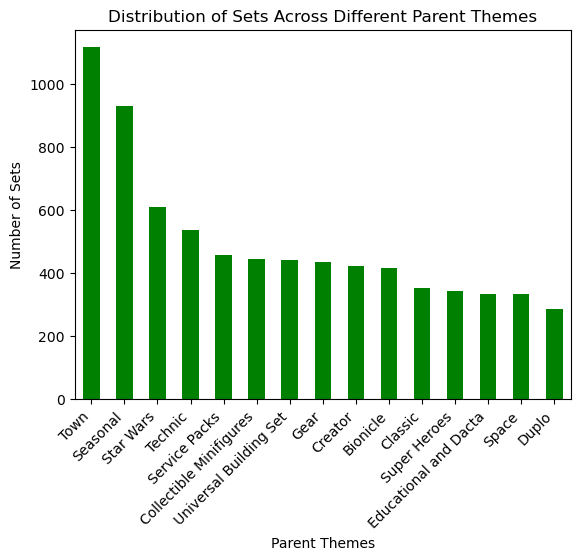

In [50]:
# Bar chart showing the distribution of sets across different parent themes
theme_counts = merged_df['parent_theme'].value_counts().head(15) 
theme_counts.plot(kind='bar', color='green')
plt.title('Distribution of Sets Across Different Parent Themes')
plt.xlabel('Parent Themes')
plt.ylabel('Number of Sets')
plt.xticks(rotation=45, ha='right')
plt.show()

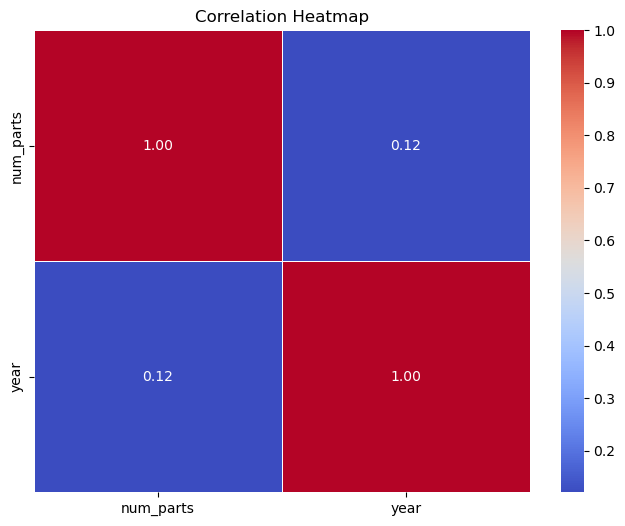

In [53]:
# Create a correlation matrix between number of parts and year.
correlation_matrix = df[['num_parts', 'year']].corr()

# Create a heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### 1. What percentage of all licensed sets ever released were Star Wars themed?

In [4]:
#merge the parent_theme from the theme df and name from the set df columns together.
merged_df = df.merge(lego_themes, left_on='parent_theme', right_on='name')
merged_df.drop(columns='name_y', inplace=True)

In [5]:
merged_df.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [6]:
#filter out the sets with themes that are licensed.
licensed_df = merged_df[merged_df['is_licensed']]
licensed_df = licensed_df.dropna(subset=['set_num'])
licensed_df.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [7]:
#what percentage of the licensed sets are Star Wars.
star_wars = licensed_df[licensed_df['parent_theme'] == 'Star Wars']

the_force = int(star_wars.shape[0] / licensed_df.shape[0] * 100)

print(the_force)

# ANSWER 1: The percentage of all licensed sets that are Star Wars themed is 51%.

51


### 2. In which year was Star Wars not the most popular licensed theme (in terms of number of sets released that year? 

In [28]:
summed_df = licensed_df.groupby(['year', 'parent_theme']).sum().reset_index()

max_df = summed_df.sort_values('is_licensed', ascending=False).drop_duplicates(['year'])

max_df.sort_values('year', inplace=True)

# max_df.head(20)


#ANSWER 2: Star Wars was beat by Super Heroes in the year 2017.

### 3. What's the average number of parts in Star Wars-themed sets compared to other themes?

In [12]:
# Create a boolean mask to filter Star Wars-themed sets.
star_wars_mask = merged_df['parent_theme'] == 'Star Wars'

# Calculate the average number of parts for Star Wars-themed sets
avg_parts_star_wars = merged_df.loc[star_wars_mask, 'num_parts'].mean()

# Calculate the average number of parts for sets of other themes
avg_parts_other_themes = merged_df.loc[~star_wars_mask, 'num_parts'].mean()

# print("Average Number of Parts in Star Wars-themed Sets:", round(avg_parts_star_wars, 2))
# print("Average Number of Parts in Other Themes:", round(avg_parts_other_themes, 2))


#3 ANSWER
# Average Number of Parts in Star Wars-themed Sets: 318.1
# Average Number of Parts in Other Themes: 155.96

Average Number of Parts in Star Wars-themed Sets: 318.1
Average Number of Parts in Other Themes: 155.96


### 4. What are the top 5 most popular themes based on the total number of sets released?

In [23]:
# Group by theme and count the number of sets for each theme
theme_counts = merged_df['parent_theme'].value_counts()

# Get the top 5 themes
top_5_themes = theme_counts.head(5)

# top_5_themes

#ANSWER 4
# parent_theme
# Town             1116
# Seasonal          928
# Star Wars         609
# Technic           536
# Service Packs     456

parent_theme
Town             1116
Seasonal          928
Star Wars         609
Technic           536
Service Packs     456
Name: count, dtype: int64

### 5. What percentage of all sets are licensed themes?

In [29]:
licensed_percentage = int(licensed_df.shape[0] / df.shape[0] * 100)
# print(licensed_percentage)

# ANSWER 5: 9% of all sets are licensed themes.

### 6. Do licensed themes tend to have more parts on average than non-licensed themes?

In [33]:
# Create boolean masks for licensed and non-licensed themes
licensed_mask = merged_df['is_licensed']
non_licensed_mask = merged_df['is_licensed'] == False

# Calculate the average number of parts for licensed themes
avg_parts_licensed = merged_df.loc[licensed_mask, 'num_parts'].mean()

# Calculate the average number of parts for non-licensed themes
avg_parts_non_licensed = merged_df.loc[non_licensed_mask, 'num_parts'].mean()

# print("Average Number of Parts in Licensed Themes:", round(avg_parts_licensed, 2))
# print("Average Number of Parts in Non-Licensed Themes:", round(avg_parts_non_licensed,2))

#ANSWER 6
# Average Number of Parts in Licensed Themes: 305.38
# Average Number of Parts in Non-Licensed Themes: 146.46

Average Number of Parts in Licensed Themes: 305.38
Average Number of Parts in Non-Licensed Themes: 146.46


### 7. Are there any parent themes that are consistently popular across the years?

In [39]:
# Group by parent theme and count the number of sets for each parent theme
theme_counts_by_year = merged_df.groupby(['parent_theme', 'year']).size().reset_index(name='set_count')

# Calculate the average number of sets per year for each parent theme
avg_sets_per_year = theme_counts_by_year.groupby('parent_theme')['set_count'].mean()

# Identify parent themes that are consistently popular
consistently_popular_themes = avg_sets_per_year[avg_sets_per_year == avg_sets_per_year.max()].index.tolist()

# print("Parent Themes That Are Consistently Popular Across the Years:")
# print(consistently_popular_themes)

#ANSWER 7
# Parent Themes That Are Consistently Popular Across the Years:
# ['Collectible Minifigures']

Parent Themes That Are Consistently Popular Across the Years:
['Collectible Minifigures']
